# Deep Learning and Data Augmentation

## Overview

Let's build a CNN model with MNIST fashion dataset without any data augmentation and then we will do data augmentation on the images, the finally compare the performance of the two model accuracies. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Loading data from keras dataset

In [2]:
# Load data method loads the dataset into 2 tuples
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Count of the X_train and X_test
print("X train {} and Test size {}".format(X_train.shape[0], X_test.shape[0]))

X train 60000 and Test size 10000


## Exploring the dataset

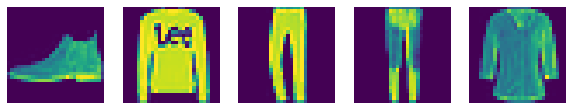

Label [9 2 1 1 6]


In [4]:
plt.figure(figsize=(10,10))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
plt.show()

print('Label %s' % (y_test[0:5]))


## Feature Scaling

Normalize both training and testing images and convert them into dimensions that are accepted by keras. 
Convert the labels to categorical values. 

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

X_train.shape

(60000, 28, 28)

In [6]:
# Convert to the tensor shape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')


In [7]:
print("X_Train shape {}".format(X_train.shape))
print("X_Test shape {}".format(X_test.shape))

X_Train shape (60000, 28, 28, 1)
X_Test shape (10000, 28, 28, 1)


**Converting Target variable to Categorical**

We need to convert the target variable to categorical variable. 

In [8]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [9]:
def build_model():
    """
        Method constructs the CNN architecture with 2D-Convolution
    """
    model = keras.models.Sequential()
    
    model.add(keras.layers.Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dropout(0.25))
    
    model.add(keras.layers.Convolution2D(32, 3, 3))
    model.add(keras.layers.Activation('relu'))
    
    model.add(keras.layers.Convolution2D(32, 3, 3))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dropout(0.25))
    
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.Activation('relu'))
    
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.Activation('softmax'))
    
    return model
    
    

In [10]:
cnn_model = build_model()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 9, 32)          320       
_________________________________________________________________
activation (Activation)      (None, 9, 9, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
activation_1 (Activation)    (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 32)          9248      
_________________________________________________________________
activation_2 (Activation)    (None, 1, 1, 32)          0

Fitting the model with the dataset.

In [11]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6359 - accuracy: 0.7642 - val_loss: 0.4687 - val_accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4601 - accuracy: 0.8303 - val_loss: 0.3932 - val_accuracy: 0.8522
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4202 - accuracy: 0.8448 - val_loss: 0.3792 - val_accuracy: 0.8605
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3935 - accuracy: 0.8545 - val_loss: 0.3589 - val_accuracy: 0.8695
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3746 - accuracy: 0.8616 - val_loss: 0.3458 - val_accuracy: 0.8726
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3619 - accuracy: 0.8680 - val_loss: 0.3353 - val_accuracy: 0.8770
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3532 - accuracy: 0.8702 - val_loss: 0.3372 - val_accuracy:

In [12]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3227 - accuracy: 0.8830


[0.3226795792579651, 0.8830000162124634]

In [13]:
history_dict = history.history

print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [14]:
def plot_train_instrumentation(epochs, data, train_param, val_param):
    
    plt.figure(figsize=(10,7))
    
    plt.plot(epochs, data[train_param], 'g', label=f'Training ({train_param})')
    plt.plot(epochs, data[val_param], 'red', label=f'Validation ({val_param})')
    
    plt.title("Training performance")
    plt.xlabel('Epochs')
    plt.ylabel(train_param)
    
    plt.legend()
    plt.show()

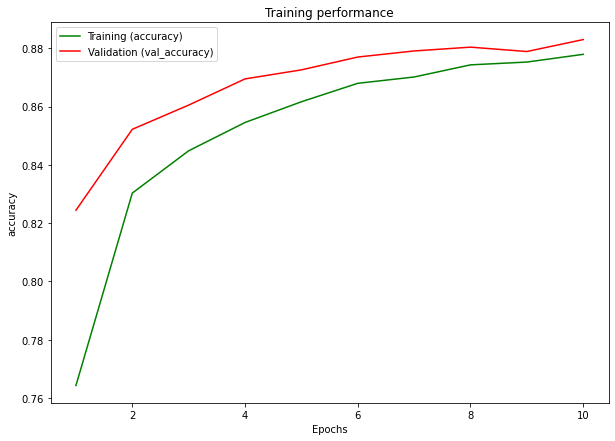

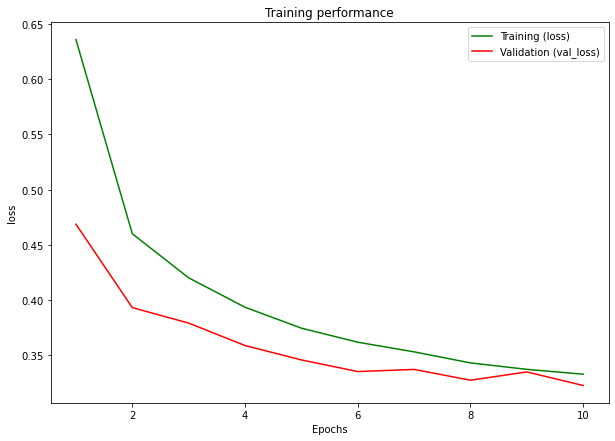

In [15]:
epochs = range(1, len(history_dict['accuracy'])+1)

plot_train_instrumentation(epochs, history_dict, 'accuracy', 'val_accuracy')
plot_train_instrumentation(epochs, history_dict, 'loss', 'val_loss')

## Data Augmentation 

**ImageDataGenerator-Class**

<pre>
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False,
    vertical_flip=False, rescale=None, preprocessing_function=None,
    data_format=None, validation_split=0.0, dtype=None
)
</pre>

**.flow() Method**
<pre>
flow(
    x, y=None, batch_size=32, shuffle=True, sample_weight=None, seed=None,
    save_to_dir=None, save_prefix='', save_format='png', subset=None
)
</pre>

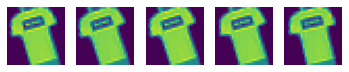

In [16]:
# Create data augmentation object
data_augmentor = ImageDataGenerator(rotation_range=50, 
                                    width_shift_range=0.01, 
                                    height_shift_range=0.01)

# fit the training data
data_augmentor.fit(X_train)

augment = data_augmentor.flow(X_train[1:2], batch_size=1)

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.imshow(augment.next().squeeze())
    plt.axis('off')
plt.show()

In [17]:
history_data_aug = cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3246 - accuracy: 0.8824 - val_loss: 0.3322 - val_accuracy: 0.8807
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3245 - accuracy: 0.8802 - val_loss: 0.3098 - val_accuracy: 0.8869
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3161 - accuracy: 0.8834 - val_loss: 0.3017 - val_accuracy: 0.8903
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3174 - accuracy: 0.8824 - val_loss: 0.3063 - val_accuracy: 0.8882
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3071 - accuracy: 0.8870 - val_loss: 0.3023 - val_accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3075 - accuracy: 0.8869 - val_loss: 0.3188 - val_accuracy: 0.8847
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.8881 - val_loss: 0.3110 - val_accuracy:

In [18]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3087 - accuracy: 0.8912


[0.30874234437942505, 0.8912000060081482]

In [19]:
history_dict = history_data_aug.history

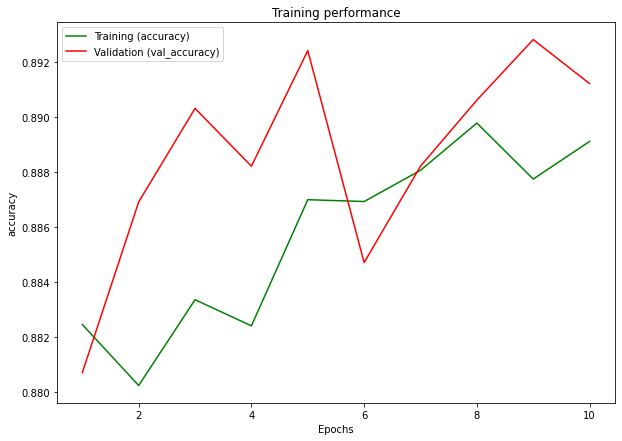

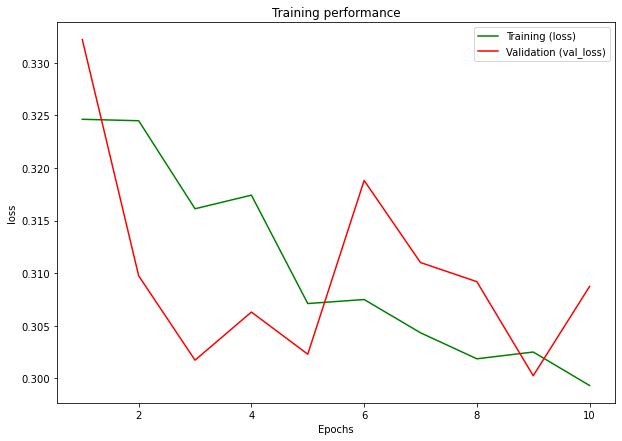

In [20]:
plot_train_instrumentation(epochs, history_dict, 'accuracy', 'val_accuracy')
plot_train_instrumentation(epochs, history_dict, 'loss', 'val_loss')

If we observe the plot we can see that there are lot of variation in the accuracy and validation accuracy. The model is overfitting(high variance), we need to regularize the model by doing normalize the data and optimize the parameter. We can do this by adding layers `BatchNormalization` and `Dropout`.

## BatchNormalization

<pre style='background-color:#EBECE4;'>
tf.keras.layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
    beta_initializer='zeros', gamma_initializer='ones',
    moving_mean_initializer='zeros', moving_variance_initializer='ones',
    beta_regularizer=None, gamma_regularizer=None, beta_constraint=None,
    gamma_constraint=None, renorm=False, renorm_clipping=None, renorm_momentum=0.99,
    fused=None, trainable=True, virtual_batch_size=None, adjustment=None, name=None,
    **kwargs
)
</pre>

In [21]:
def construct_model(input_shape=(28,28,1)):
    
    model = keras.models.Sequential()
    
    model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape= input_shape))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Conv2D(32, kernel_size=5, strides=2, padding='same',  activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    ## Dropout Regularization of 0.4 in order to avoid overfitting
    model.add(keras.layers.Conv2D(64, kernel_size=3,  activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Conv2D(64, kernel_size=3,  activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Conv2D(64, kernel_size=5, strides=2, padding='same',  activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    
    model.add(keras.layers.Conv2D(64, kernel_size=4,  activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model
    

In [22]:
conv_model = construct_model((28,28,1))

conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)       

In [23]:
# Compile the model
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model with training set
history = conv_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6098 - accuracy: 0.7809 - val_loss: 0.3476 - val_accuracy: 0.8713
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3932 - accuracy: 0.8608 - val_loss: 0.2959 - val_accuracy: 0.8928
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3406 - accuracy: 0.8801 - val_loss: 0.2765 - val_accuracy: 0.8978
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3099 - accuracy: 0.8931 - val_loss: 0.2720 - val_accuracy: 0.8975
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2838 - accuracy: 0.9003 - val_loss: 0.2478 - val_accuracy: 0.9104
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2636 - accuracy: 0.9077 - val_loss: 0.2319 - val_accuracy: 0.9156
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2483 - accuracy: 0.9132 - val_loss: 0.2308 - val_accuracy:

In [24]:
def plot_model_performance(model_history, metric, val_metric):
    plt.figure(figsize=(10,8))
    plt.plot(model_history.history[metric], label=str('Training '+ metric))
    plt.plot(model_history.history[val_metric], label=str('Validation '+ val_metric))
    plt.title(metric+" vs "+val_metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend()
    plt.show()

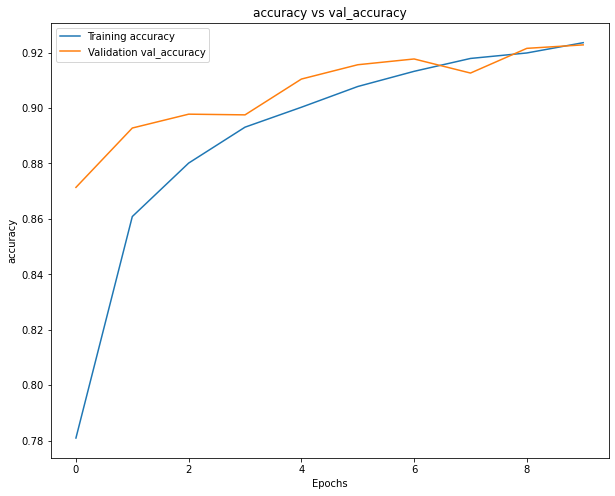

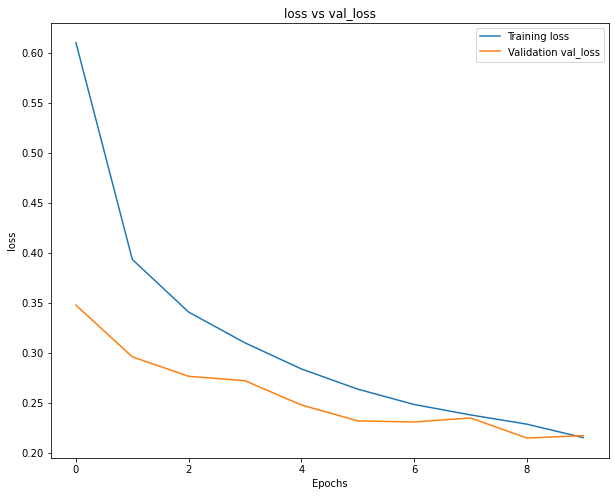

In [25]:
plot_model_performance(history, 'accuracy', 'val_accuracy')
plot_model_performance(history, 'loss', 'val_loss')